<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

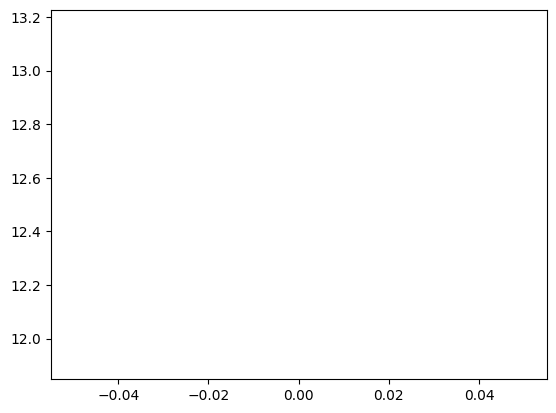

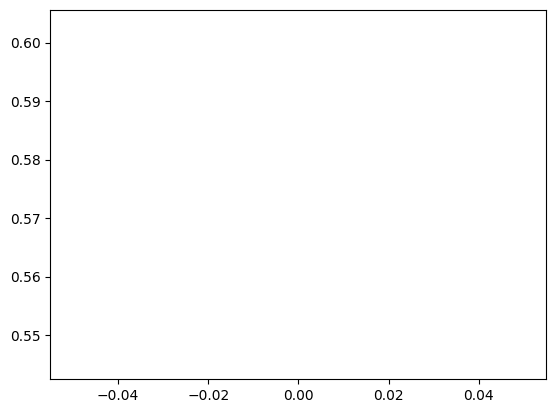

In [18]:
# Exercise 3.4

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate
from sympy.utilities.lambdify import lambdify

# Initialization
Vbati = []
SOCi = []

# Outer loop
for I1 in range(5, 6):  # Equivalent to MATLAB: for I1=5:1:5;
    t1 = 7
    SOC1 = 0.2
    K = 0.8
    D = 1e-5
    SOCm = 936
    ns = 6
    SOC2 = SOC1

    # Time loop
    for t in np.arange(0, t1 + 0.1, 0.1):
        B = SOC2
        if I1 <= 0:  # Discharging mode
            V1 = (1.926 + 0.124 * B) * ns
            R1 = (0.19 + 0.1037 / (B - 0.14)) * ns / SOCm
        else:  # Charging mode
            V1 = (2 + 0.148 * B) * ns
            R1 = (0.758 + 0.1309 / (1.06 - B)) * ns / SOCm
            R1 = float(R1)

        # Symbolic integration
        v = symbols('v')
        f1 = K * V1 * I1 - D * SOC2 * SOCm
        ee = integrate(f1, (v, 0, t))
        SOC = SOC1 + (1 / SOCm) * ee
        SOC2 = SOC

    Vbat = V1 + I1 * R1
    Vbati.append(float(Vbat))
    SOCi.append(float(SOC))

# Plotting

plt.figure()
plt.plot(Vbati)


plt.figure()
plt.plot(SOCi)

